In [2]:
import pandas as pd

In [3]:
s1 = pd.Series([0.1, 0.3, 0.5, 1])

In [4]:
s1

0    0.1
1    0.3
2    0.5
3    1.0
dtype: float64

In [5]:
type(s1)

pandas.core.series.Series

In [6]:
s1.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
type(s1.values)

numpy.ndarray

In [8]:
s1

0    0.1
1    0.3
2    0.5
3    1.0
dtype: float64

In [9]:
import numpy as np

In [10]:
np.array([1, 2])

array([1, 2])

In [11]:
s1[0]

0.1

In [12]:
s2 = pd.Series(index=['A', 'B', 'C'], data=[10, 14, 16])

In [13]:
s2

A    10
B    14
C    16
dtype: int64

In [14]:
s2[0]

10

In [15]:
s2['A']

10

In [16]:
data = {'pomme': 10, 'kiwi': 20, 'poire': 5}

In [17]:
s3 = pd.Series(data)

In [18]:
s3

pomme    10
kiwi     20
poire     5
dtype: int64

In [19]:
s3[s3 > 8]

pomme    10
kiwi     20
dtype: int64

In [20]:
s3 > 8

pomme     True
kiwi      True
poire    False
dtype: bool

In [21]:
s3 * 2

pomme    20
kiwi     40
poire    10
dtype: int64

In [22]:
import numpy as np
np.exp(s3)

pomme    2.202647e+04
kiwi     4.851652e+08
poire    1.484132e+02
dtype: float64

In [23]:
s3.sum()

35

In [24]:
s3.mean()

11.666666666666666

In [25]:
"pomme" in s3

True

In [26]:
10 in s3

False

In [27]:
s3[["pomme", "poire"]]

pomme    10
poire     5
dtype: int64

In [28]:
s3 + s3

pomme    20
kiwi     40
poire    10
dtype: int64

In [29]:
s4 = s3 + s3.drop("kiwi")  # NaN means "Not a Number"

In [30]:
s4.isnull()

kiwi      True
poire    False
pomme    False
dtype: bool

In [31]:
s4.notnull()

kiwi     False
poire     True
pomme     True
dtype: bool

In [32]:
s4[s4.notnull()]

poire    10.0
pomme    20.0
dtype: float64

In [33]:
s4

kiwi      NaN
poire    10.0
pomme    20.0
dtype: float64

In [34]:
s4.index = ["banane", "tomate", "mangue"]#, "haricot"]

In [35]:
s4

banane     NaN
tomate    10.0
mangue    20.0
dtype: float64

## DataFrames

In [44]:
df = pd.DataFrame({
    "name": ["pomme", "poire", "pasteque", "mangue"],
    "price": [1, 2, 5, 4.5],
    "weight": [40, 60, 3500, 200],
})
df["price_per_kg"] = df["price"] / (df["weight"] / 1000)
df = df.set_index("name")

In [37]:
df

,price,weight,price_per_kg
name,,,
pomme,1.0,40,25.000000
poire,2.0,60,33.333333
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, pomme to mangue
Data columns (total 3 columns):
price           4 non-null float64
weight          4 non-null int64
price_per_kg    4 non-null float64
dtypes: float64(2), int64(1)
memory usage: 128.0+ bytes


In [39]:
df.describe()

,price,weight,price_per_kg
count,4.000000,4.000000,4.000000
mean,3.125000,950.000000,20.565476
std,1.931105,1701.489544,13.572603
min,1.000000,40.000000,1.428571
25%,1.750000,55.000000,17.232143
50%,3.250000,130.000000,23.750000
75%,4.625000,1025.000000,27.083333
max,5.000000,3500.000000,33.333333


In [40]:
df.index

Index(['pomme', 'poire', 'pasteque', 'mangue'], dtype='object', name='name')

In [41]:
df.columns

Index(['price', 'weight', 'price_per_kg'], dtype='object')

In [42]:
df.columns = ["a", "b", "c"]

In [46]:
df

,price,weight,price_per_kg
name,,,
pomme,1.0,40,25.000000
poire,2.0,60,33.333333
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000


In [43]:
# df = df.set_index("name")  # df.set_index("name", inplace=True)

In [42]:
df.reset_index()  # df.reset_index(drop=True) si on veut pas garder l'index

,name,price,weight,price_per_kg
0,pomme,1.0,40,25.000000
1,poire,2.0,60,33.333333
2,pasteque,5.0,3500,1.428571
3,mangue,4.5,200,22.500000


In [43]:
df["price"].sum()

12.5

In [44]:
df["price_per_kg"] = df["price"] / (df["weight"] / 1000)

In [45]:
df

,price,weight,price_per_kg
name,,,
pomme,1.0,40,25.000000
poire,2.0,60,33.333333
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000


In [46]:
df.to_csv("fruits_export.csv") #, columns=["price_per_kg", "price"])

In [47]:
df[(df["price_per_kg"] > 24) & (df["price"] < 1.5)]  # or -> |

,price,weight,price_per_kg
name,,,
pomme,1.0,40,25.0


In [47]:
df.sort_values("weight", ascending=False, inplace=True)

In [48]:
df

,price,weight,price_per_kg
name,,,
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000
poire,2.0,60,33.333333
pomme,1.0,40,25.000000


In [49]:
df.sort_index()

,price,weight,price_per_kg
name,,,
mangue,4.5,200,22.500000
pasteque,5.0,3500,1.428571
poire,2.0,60,33.333333
pomme,1.0,40,25.000000


In [50]:
df

,price,weight,price_per_kg
name,,,
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000
poire,2.0,60,33.333333
pomme,1.0,40,25.000000


In [51]:
df[["price", "price_per_kg"]]

,price,price_per_kg
name,,
pasteque,5.0,1.428571
mangue,4.5,22.500000
poire,2.0,33.333333
pomme,1.0,25.000000


In [52]:
df

,price,weight,price_per_kg
name,,,
pasteque,5.0,3500,1.428571
mangue,4.5,200,22.500000
poire,2.0,60,33.333333
pomme,1.0,40,25.000000


In [53]:
df.loc["pomme", "weight"]

40

In [54]:
df.loc[["pomme", "poire"], "weight"]

name
pomme    40
poire    60
Name: weight, dtype: int64

In [55]:
df.iloc[:2,:2]

,price,weight
name,,
pasteque,5.0,3500
mangue,4.5,200


In [56]:
# df.index = [0, 1, 2, 3]

In [57]:
# df.loc[:2]

In [58]:
df[df > 25] = 80

In [59]:
df

,price,weight,price_per_kg
name,,,
pasteque,5.0,80,1.428571
mangue,4.5,80,22.500000
poire,2.0,80,80.000000
pomme,1.0,80,25.000000


In [60]:
df

,price,weight,price_per_kg
name,,,
pasteque,5.0,80,1.428571
mangue,4.5,80,22.500000
poire,2.0,80,80.000000
pomme,1.0,80,25.000000


In [61]:
df.reset_index()

,name,price,weight,price_per_kg
0,pasteque,5.0,80,1.428571
1,mangue,4.5,80,22.500000
2,poire,2.0,80,80.000000
3,pomme,1.0,80,25.000000


## Garder les lignes avec un o dans le nom du fruit

In [62]:
df = df.reset_index()

In [63]:
df[df["name"].apply(lambda x: "o" in x)]

,name,price,weight,price_per_kg
2,poire,2.0,80,80.0
3,pomme,1.0,80,25.0


In [64]:
df["name_short"] = df["name"].apply(lambda x: x[:4])

In [65]:
df

,name,price,weight,price_per_kg,name_short
0,pasteque,5.0,80,1.428571,past
1,mangue,4.5,80,22.500000,mang
2,poire,2.0,80,80.000000,poir
3,pomme,1.0,80,25.000000,pomm


### Télécharger sur data.gouv.fr le fichier `Les prénoms des conseillers municipaux `

In [66]:
df = pd.read_csv("prenoms.csv", sep=";")

In [67]:
df.head()

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102


### 1. Combien de conseillers municipaux en France ?
### 2. Pourcentage de femmes conseillères municipales ?

In [68]:
df["genre"].unique()

array(['M', 'F'], dtype=object)

In [69]:
df["nb"].sum()

526989

In [70]:
df[df["genre"] == "F"]["nb"].sum()

184725

In [71]:
df["genre"].value_counts()

M    6581
F    5886
Name: genre, dtype: int64

In [72]:
df.groupby("genre")["nb"].sum()
# SELECT genre, SUM(nb)
# FROM table
# GROUP BY genre

genre
F    184725
M    342264
Name: nb, dtype: int64

In [73]:
%matplotlib inline

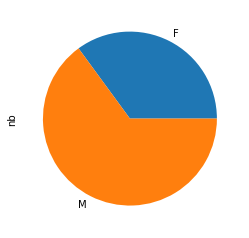

In [74]:
df.groupby("genre")["nb"].sum().plot(kind="pie")

## Trouver le prénom le plus long

In [75]:
df = df.dropna(subset=["prenom"])

In [76]:
df[df["prenom"].isnull()]

,prenom,genre,nb


In [77]:
df["len_name"] = df["prenom"].apply(lambda x: len(x))

In [78]:
df.sort_values("len_name", ascending=False).head()

,prenom,genre,nb,len_name
4874,"Christiane, Victoire Marie-Emm",F,1,30
6750,Emilienne Marieta Atea Vahine,F,1,29
12231,Marie Lamberte Dite Alisette,F,1,28
11671,Freddy Tapunui Vane Dit Coco,M,1,28
4601,Law De Lauriston De Boubers,M,1,27


## Trouver la liste des prénoms unisexes

In [79]:
df.head()

,prenom,genre,nb,len_name
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


#### Avec un groupby

In [80]:
fm_count = df.groupby("prenom")["genre"].count()

In [81]:
fm_count[fm_count == 2].head()

prenom
A. Marie      2
Abdelkader    2
Achille       2
Adda          2
Agathe        2
Name: genre, dtype: int64

In [82]:
len(fm_count[fm_count == 2])

746

#### avec un join

In [83]:
f_df = df[df["genre"] == "F"]
m_df = df[df["genre"] == "M"]

In [84]:
f_df.head(2)

,prenom,genre,nb,len_name
22,Catherine,F,4389,9
23,Françoise,F,4334,9


In [85]:
m_df.head(2)

,prenom,genre,nb,len_name
0,Michel,M,14136,6
1,Alain,M,10646,5


In [86]:
m_df.merge(f_df, on="prenom")["prenom"].sort_values().head()

528      A. Marie
187    Abdelkader
204       Achille
538          Adda
735        Agathe
Name: prenom, dtype: object

#### 

In [87]:
m_df[m_df["prenom"].isin(f_df["prenom"])].head()

,prenom,genre,nb,len_name
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


In [88]:
m_df["prenom"].apply(lambda x: len(x))

0         6
1         5
2         8
3         7
4         9
5         6
6         6
7        11
8         7
9         6
10        6
11        7
12       11
13        6
14        7
15        4
16        4
17        9
18        5
19        6
20       10
21        7
25        8
27        3
31        6
32        5
33        9
34        4
35        7
36        8
         ..
12408    11
12409    17
12411    14
12412     7
12413    10
12416    13
12417     6
12420     5
12421     6
12422    15
12424     5
12425     5
12426     8
12429    15
12430     3
12431     9
12432     6
12433    12
12439    14
12440     6
12441    13
12450    12
12452     4
12453    17
12454    13
12455    11
12456    20
12457     6
12461    12
12462     9
Name: prenom, Length: 6580, dtype: int64

### Trouver tous les prénoms en "Jean-"

In [89]:
df[df["prenom"].apply(lambda x: "Jean-" in x)]

,prenom,genre,nb,len_name
7,Jean-Pierre,M,6945,11
12,Jean-Claude,M,5952,11
33,Jean-Paul,M,3547,9
38,Jean-Luc,M,3361,8
42,Jean-Louis,M,3155,10
46,Jean-Marie,M,2863,10
51,Jean-François,M,2772,13
52,Jean-Michel,M,2595,11
62,Jean-Marc,M,2276,9
86,Jean-Jacques,M,1660,12


In [90]:
df[df["prenom"].str.contains("Jean-")]

,prenom,genre,nb,len_name
7,Jean-Pierre,M,6945,11
12,Jean-Claude,M,5952,11
33,Jean-Paul,M,3547,9
38,Jean-Luc,M,3361,8
42,Jean-Louis,M,3155,10
46,Jean-Marie,M,2863,10
51,Jean-François,M,2772,13
52,Jean-Michel,M,2595,11
62,Jean-Marc,M,2276,9
86,Jean-Jacques,M,1660,12


In [91]:
df.head()

,prenom,genre,nb,len_name
0,Michel,M,14136,6
1,Alain,M,10646,5
2,Philippe,M,9903,8
3,Bernard,M,8992,7
4,Christian,M,8102,9


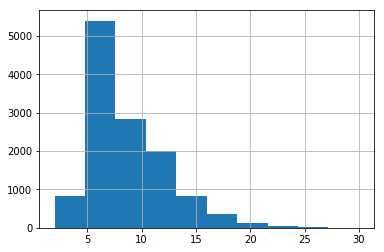

In [93]:
df["len_name"].hist(b)

## world-population-history

In [18]:
pop = pd.read_csv("world-population-history.csv", skiprows=2)
pop = pop[pop["Country Name"] != "World"]

In [19]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105000.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530000.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784000.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2879000.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,77000.0,NaN


1. Donner la population mondiale en 2017
2. Afficher l'évolution de la population mondiale entre 1960 et 2017
3. Trouver le pays le plus peuplé en 1998

In [20]:
pop["2017"].sum()

72248530000.0

In [21]:
results = {}
for year in range(1960, 2018):
    results[str(year)] = pop[str(year)].sum()

In [22]:
%matplotlib inline

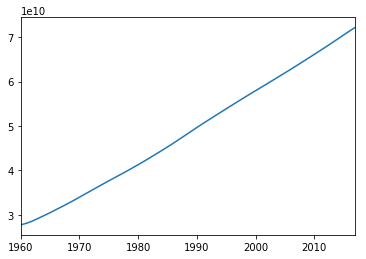

In [23]:
pd.Series(results).plot(kind='line')

In [26]:
pop.sort_values("1998", ascending=False)[["Country Name", "1998"]]

,Country Name,1998
101,IDA & IBRD total,4.922022e+09
138,Low & middle income,4.900129e+09
154,Middle income,4.497323e+09
100,IBRD only,3.886504e+09
60,Early-demographic dividend,2.385398e+09
137,Lower middle income,2.255688e+09
247,Upper middle income,2.241636e+09
140,Late-demographic dividend,2.011384e+09
61,East Asia & Pacific,2.005144e+09
59,East Asia & Pacific (excluding high income),1.776225e+09
